In [6]:
# import xesmf as xe
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


In [4]:
ds_in = xr.open_dataset("SAMI_REGRID_2011-11-21T00-00-00.nc", engine='h5netcdf')

TypeError: DataArray.polyfit() got an unexpected keyword argument 'coef'

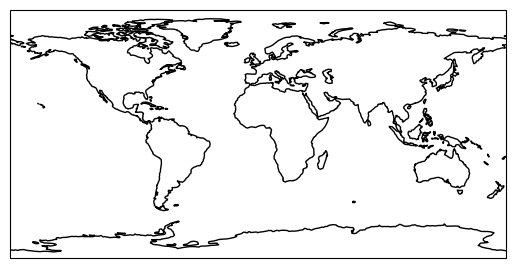

In [13]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ds_in.edens.sel(alt=300, method='nearest').polyfit(coef='coef').plot(ax=ax, transform=ccrs.PlateCarree(), aa=True, cmap='bwr')

# .plot(ax=ax, transform=ccrs.PlateCarree(), aa=True, cmap='bwr')
ax.gridlines(draw_labels=True, alpha=0.7, linestyle='--')

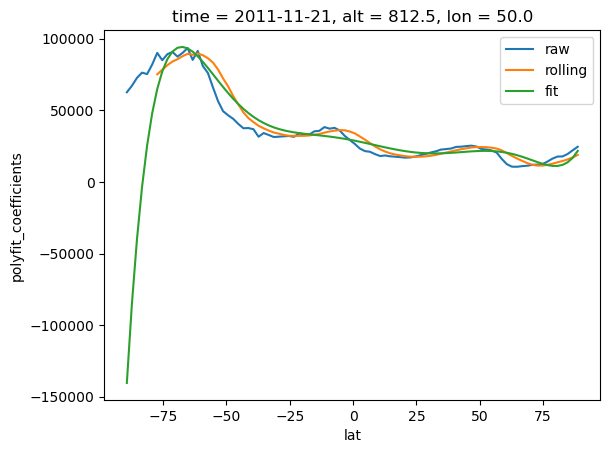

In [72]:

to_fit = ds_in.edens.sel(lon=50, alt=800, method='nearest').copy()

to_fit.plot(label='raw')

to_fit = to_fit.rolling(lat=7).mean(center=True)
to_fit.plot(label='rolling')

fit=to_fit.polyfit('lat', 7)

xr.polyval(to_fit.lat, fit).polyfit_coefficients.plot(label='fit')

plt.legend()

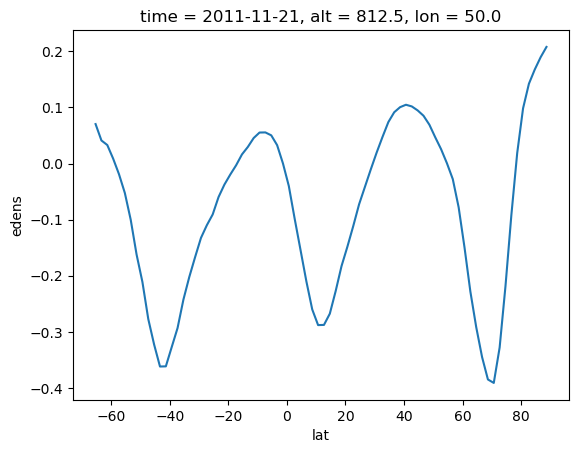

In [73]:
# to_fit.plot()
((to_fit - to_fit.rolling(lat=7).mean(center=True))/to_fit).plot()

In [51]:
xr.polyval(ds_in.lat, fit)

<xarray.Dataset>
Dimensions:               (lat: 90)
Coordinates:
    time                  datetime64[ns] 2011-11-21
  * lat                   (lat) float64 -89.33 -87.33 -85.33 ... 86.67 88.67
Data variables:
    polyfit_coefficients  (lat) float64 9.127e+04 8.915e+04 ... 2.021e+04

In [5]:
ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90, 90, 1.5)),
                     'lon': (['lon'], np.arange(0, 360, 5)),})

alt_out = [325,425]

In [19]:
ds_rg = xe.Regridder(ds_in, ds_out, 'bilinear', reuse_weights=False)

In [20]:
ds_rg

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_180x90_120x72.nc 
Reuse pre-computed weights? False 
Input grid shape:           (180, 90) 
Output grid shape:          (120, 72) 
Periodic in longitude?      False

In [21]:
ds_out = ds_rg(ds_in)

/glade/work/abukowski/conda-envs/xesmf/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


In [22]:
ds_out

<xarray.Dataset>
Dimensions:         (alt: 5, lat: 120, lon: 72)
Coordinates:
  * alt             (alt) float64 300.0 350.0 400.0 450.0 500.0
  * lat             (lat) float64 -90.0 -88.5 -87.0 -85.5 ... 85.5 87.0 88.5
  * lon             (lon) int64 0 5 10 15 20 25 30 ... 330 335 340 345 350 355
Data variables: (12/25)
    edens           (alt, lat, lon) float64 1.967e+05 1.967e+05 ... 2.296e+05
    h+dens          (alt, lat, lon) float64 12.82 12.82 12.82 ... 381.5 381.6
    o+dens          (alt, lat, lon) float64 1.485e+05 1.485e+05 ... 2.286e+05
    n+odens         (alt, lat, lon) float64 3.287e+04 3.287e+04 ... 35.38 35.35
    o2+dens         (alt, lat, lon) float64 9.392e+03 9.392e+03 ... 23.69 23.66
    he+dens         (alt, lat, lon) float64 0.06781 0.06781 ... 5.339 5.348
    ...              ...
    h+vel_parallel  (alt, lat, lon) float64 3.293e+03 3.293e+03 ... 4.753e+03
    o+vel_parallel  (alt, lat, lon) float64 8.299e+03 8.299e+03 ... 2.858e+03
    mer_exb         (alt, lat, lon) float64 -5.638e+04 -5.638e+04 ... 7.642e+04
    zon_exb         (alt, lat, lon) float64 -2.96e+03 -2.96e+03 ... -8.371e+04
    zon_neut        (alt, lat, lon) float64 -1.401e+04 -1.401e+04 ... -2.845e+04
    mer_neut        (alt, lat, lon) float64 -9.024e+03 -9.024e+03 ... -5.584e+04
Attributes:
    regrid_method:  bilinear

In [23]:
#interpolate ds_out in alt
ds_out2 = ds_out.interp(alt=alt_out)

In [24]:
ds_out2

<xarray.Dataset>
Dimensions:         (alt: 2, lat: 120, lon: 72)
Coordinates:
  * lat             (lat) float64 -90.0 -88.5 -87.0 -85.5 ... 85.5 87.0 88.5
  * lon             (lon) int64 0 5 10 15 20 25 30 ... 330 335 340 345 350 355
  * alt             (alt) int64 325 425
Data variables: (12/25)
    edens           (alt, lat, lon) float64 2.131e+05 2.131e+05 ... 2.416e+05
    h+dens          (alt, lat, lon) float64 19.4 19.4 19.4 ... 209.6 209.6 209.7
    o+dens          (alt, lat, lon) float64 1.768e+05 1.768e+05 ... 2.409e+05
    n+odens         (alt, lat, lon) float64 2.415e+04 2.415e+04 ... 118.0 117.9
    o2+dens         (alt, lat, lon) float64 7.115e+03 7.115e+03 ... 114.9 114.8
    he+dens         (alt, lat, lon) float64 0.1024 0.1024 ... 0.2628 0.2633
    ...              ...
    h+vel_parallel  (alt, lat, lon) float64 2.247e+03 2.247e+03 ... 6.23e+03
    o+vel_parallel  (alt, lat, lon) float64 7.368e+03 7.368e+03 ... 2.609e+03
    mer_exb         (alt, lat, lon) float64 -5.649e+04 -5.649e+04 ... 7.522e+04
    zon_exb         (alt, lat, lon) float64 -3.134e+03 -3.134e+03 ... -8.266e+04
    zon_neut        (alt, lat, lon) float64 -1.203e+04 -1.203e+04 ... -2.806e+04
    mer_neut        (alt, lat, lon) float64 -6.68e+03 -6.68e+03 ... -5.604e+04
Attributes:
    regrid_method:  bilinear